In [1]:
### take care that this manuscript is intended to generate a outside tomography model to cover the mesh file, thus the spatial grid is not necessary 
### equal to the mesh and you could make a very dense mesh, of course a dense is better since the specfem will interpolate the grid velocity to the mesh 
### automatically. just be carefull when you build a model with anomalies.

In [2]:
##### building sperical mesh tomographic model for the specfem2d 
##### becareful here the definitation is from Cartesin coordinates 
import numpy as np
import matplotlib.pyplot as plt
maxx=30*111*1000
minx=0
maxz=0
minz=-900*1000
nx = 720 # Number of sampling points in x direction
nz = 200 #Number of sampling points in z direction
x = np.linspace(minx,maxx,nx)
z = np.linspace(minz,maxz,nz)
spacing_x = (maxx-minx)/(nx-1)
spacing_z = (maxz-minz)/(nz-1)
print ("space x space z", spacing_x,spacing_z)

space x space z 4631.432545201669 4522.613065326633


In [3]:
def flat2sperical(vf,zf,rp):
#function [vs,zs]=mkflat2sfer(vf,zf,rp);
#mkflat2sfer.........flattening earth transform: flat to spherical earth
#
#call: [vs,zs]=mksfer2flat(vf,zf,rp);
#
#%               vf: velocities in flat Planet at depths given in zf
#%               zf: depths below surface in flat planet, at which velocites
#%                   are given
#%               rp: planetary Radius
#%
#%               zf and rp have to be in the same units.
#%               vf and zf may be matrices of arbitrary size.
#%
#% result: vs: equivalent velocity in spherical Planet
#%         zs: equivalent depths in spherical Planet
#%
#%         vs and zs will be in the same units as vf and zf are.
#%         Depth inf will be transformed into the center of the Planet.
#%
#% wave traveltimes through the spherical model will be equal to the traveltimes
#% in the flat model.
#% References: Mueller, G (1991), Inversionstheorie, Univ. Frankfurt
#%
#% Martin Knapmeyer, 18.04.2002, 10.02.2004


#%%% transformation of depths into distance from center
    r=np.exp(-zf/rp); #%r=rp*exp(-zf/rp);


#%%% transformation of velocity
    vs=r*vf; #%vs=r.*vf/rp;

#%%% transformation of radii into depths beneath surface
    zs=rp*(1-r);# %zs=rp-r;
    return vs,zs

#%%% that's all, folks.
 
def mksfer2flat(vs,zs,rp):
#function [vf,zf]=mksfer2flat(vs,zs,rp);
# mksfer2flat.........flattening earth transform: spherical to flat earth
#%
#% call: [vf,zf]=mksfer2flat(vs,zs,rp);
#%
#%               vs: velocities in spherical Planet at depths given in zs
#%               zs: depths below surface in spherical planet, at which velocites
#%                   are given
#%               rp: planetary Radius
#%
#%               zs and rp have to be in the same units.
#%               vs and zs may be matrices of arbitrary size.
#%
#% result: vf: equivalent velocity in flattened Planet
#%         zf: equivalent depths in flattened Planet
#%
#%         vf and zf will be in the same units as vs and zs are.
#%         The center of the planet will be transformed to depth inf.
#%
#% wave traveltimes through the flattened model will be equal to the traveltimes
#% in the spherical model.
#% References: Mueller, G (1991), Inversionstheorie, Univ. Frankfurt
#%
#% Martin Knapmeyer, 18.04.2002, 10.11.2003, 10.02.2004

#%%% transform spherical depth into Radius
    r=rp-zs; 

#%%% find zero elements of r = these cannot be mapped using the log
#    %%% r=0 will be mapped to zf=inf explicitly.
    #indies=np.where(r==0);
    #print indies
    #r[indies]=-1; #% r=-1 is physically impossible and produces no warning

#%%% transformation of dephts
    zf=rp*np.log(rp/r,dtype=float);
    print(rp/r)
    zf=np.abs(zf);  #% repairs the r=-1 substitution from above
    zf=np.real(zf);# % even flat depths are real numbers. MK10112003

#%%% transformation of velocities
    vf=vs/r;
    vf=vf*rp;
    vf=vf; #% repairs the r=-1 substitution from above

#%%% that's all, folks. 

    return vf,zf




In [4]:
model=np.loadtxt('Wasjamodel.md')

In [5]:
model.swapaxes(0,1)

array([[0.00000e+00, 6.00000e+00, 6.00000e+00, 1.50000e+01, 1.50000e+01,
        3.50000e+01, 3.50000e+01, 5.00000e+01, 5.00000e+01, 6.00000e+01,
        1.20000e+02, 1.65000e+02, 2.10000e+02, 2.10000e+02, 2.60000e+02,
        3.10000e+02, 3.60000e+02, 4.10000e+02, 4.10000e+02, 4.60000e+02,
        5.10000e+02, 5.60000e+02, 6.10000e+02, 6.60000e+02, 6.60000e+02,
        7.10000e+02, 7.60000e+02, 8.09500e+02, 8.59000e+02, 9.08500e+02,
        9.58000e+02, 1.00750e+03, 1.05700e+03, 1.10650e+03, 1.15600e+03,
        1.20550e+03, 1.25500e+03, 1.30450e+03, 1.35400e+03, 1.40350e+03,
        1.45300e+03, 1.50250e+03, 1.55200e+03, 1.60150e+03, 1.65100e+03,
        1.70050e+03, 1.75000e+03, 1.79950e+03, 1.84900e+03, 1.89850e+03,
        1.94800e+03, 1.99750e+03, 2.04700e+03, 2.09650e+03, 2.14600e+03,
        2.19550e+03, 2.24500e+03, 2.29450e+03, 2.34400e+03, 2.39350e+03,
        2.44300e+03, 2.49250e+03, 2.54200e+03, 2.59150e+03, 2.64100e+03,
        2.69050e+03, 2.74000e+03, 2.74000e+03, 2.78

In [6]:
model=np.loadtxt('Wasjamodel.md')
model=model.swapaxes(0,1)
#####here I need to transform the velocity under sperical stats into flat depth and then interpolate

vp_ori,z_ori=mksfer2flat(model[1],model[0],6371)
vs_ori,z_ori=mksfer2flat(model[2],model[0],6371)
rho_ori,z_ori=mksfer2flat(model[3],model[0],6371)
##### interpolate the flat depth (mesh depth) to the transformed depth from model 
vp=np.interp(-z/1000,z_ori,vp_ori)*1000
vs=np.interp(-z/1000,z_ori,vs_ori)*1000
rho=np.interp(-z/1000,z_ori,rho_ori)*1000


[  1.           1.00094266   1.00094266   1.00235997   1.00235997
   1.00552399   1.00552399   1.00791014   1.00791014   1.00950721
   1.01919693   1.02658717   1.03408538   1.03408538   1.04254623
   1.05114668   1.0598902    1.06878041   1.06878041   1.07782101
   1.08701587   1.09636896   1.1058844    1.11556645   1.11556645
   1.12541954   1.13544823   1.14555426   1.1558418    1.16631579
   1.17698134   1.18784376   1.19890854   1.2101814    1.22166826
   1.23337528   1.24530884   1.25747557   1.2698824    1.28253649
   1.2954453    1.30861662   1.32205852   1.33577943   1.34978814
   1.36409378   1.37870591   1.39363447   1.40888987   1.42448295
   1.44042505   1.45672802   1.47340426   1.49046672   1.50792899
   1.52580529   1.54411052   1.5628603    1.58207102   1.6017599
   1.62194501   1.64264535   1.66388091   1.68567271   1.7080429
   1.73101481   1.75461305   1.75461305   1.77894804   1.80396243
   1.82969558   1.82969558   1.85653049   1.88416427   1.91263311
   1.9419754

/home/yjgao/anaconda3/envs/salvus/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in true_divide
/home/yjgao/anaconda3/envs/salvus/lib/python3.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in true_divide
/home/yjgao/anaconda3/envs/salvus/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in true_divide


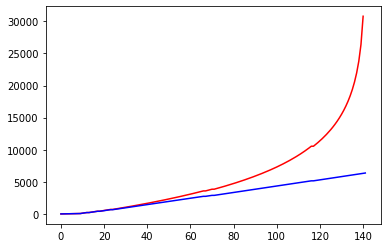

In [7]:
### comparsion of 
plt.plot(z_ori,'red')
plt.plot(model[0],'blue')
#plt.ylim(0,1100)

In [8]:
####1100 km in cartesian depth to sperical depth
flat2sperical(10,1100,6371)

(8.414258769751134, 1010.2757377915525)

(0.0, 800.0)

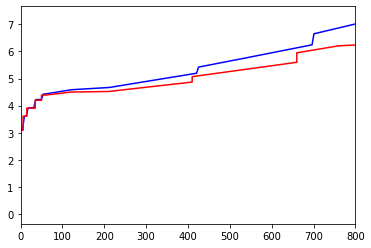

In [9]:
plt.plot(-z/1000,vs/1000,'b')
plt.plot(model[0],model[2],'r')
plt.xlim(0,800)

In [10]:
fo = open("MODELS/profile_syn.xyz", "w+") # Name of the file it has to be set in the Par_file
print( "Name of the file: ", fo.name)
orig_x=0
orig_z=0
end_x=maxx
end_z=maxz


line1 = str(orig_x)+" "+str(orig_z)+" "+str(end_x)+" "+str(end_z)+"\n"
line2 = str(spacing_x)+" "+str(spacing_z)+"\n"
line3 = str(nx)+" "+str(nz)+"\n"
# line4 : vpMin vpMax vsMin vsMax rhoMin rhoMax
line4 = str(min(vp))+" "+str(max(vp))+" "+str(min(vs))+" "+str(max(vs))+" "+str(min(rho))+" "+str(max(rho))+"\n"
# Write a line at the end of the file.
fo.write(line1)
fo.write(line2)
fo.write(line3)
fo.write(line4)


###set the heterogeneities location
xl=(6.5+10)*111*1000
xr=(8+10)*111*1000
zu=-220*1000
zb=-360*1000



for iz in np.arange(nz):
    for ix in np.arange(nx):
        #!!WARNING!! if you want 2D variations you have to add a dependence of vp on x (vp[ix,iz]).
        if x[ix]>xl and x[ix]<xr and z[iz]<zu and  z[iz] > zb:
            print( x[ix],z[iz])
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n"
        else:
            #print x[ix],z[iz]
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
        fo.write(lineToWrite)

#plt.show()
# Close opened file
fo.close()



Name of the file:  MODELS/profile_syn.xyz
1834047.287899861 -357286.43216080405
1838678.7204450627 -357286.43216080405
1843310.1529902644 -357286.43216080405
1847941.585535466 -357286.43216080405
1852573.0180806676 -357286.43216080405
1857204.4506258694 -357286.43216080405
1861835.883171071 -357286.43216080405
1866467.3157162727 -357286.43216080405
1871098.7482614743 -357286.43216080405
1875730.180806676 -357286.43216080405
1880361.6133518778 -357286.43216080405
1884993.0458970794 -357286.43216080405
1889624.478442281 -357286.43216080405
1894255.9109874826 -357286.43216080405
1898887.3435326843 -357286.43216080405
1903518.776077886 -357286.43216080405
1908150.2086230877 -357286.43216080405
1912781.6411682894 -357286.43216080405
1917413.073713491 -357286.43216080405
1922044.5062586928 -357286.43216080405
1926675.9388038944 -357286.43216080405
1931307.371349096 -357286.43216080405
1935938.8038942977 -357286.43216080405
1940570.2364394993 -357286.43216080405
1945201.6689847012 -357286.432

1834047.287899861 -235175.87939698494
1838678.7204450627 -235175.87939698494
1843310.1529902644 -235175.87939698494
1847941.585535466 -235175.87939698494
1852573.0180806676 -235175.87939698494
1857204.4506258694 -235175.87939698494
1861835.883171071 -235175.87939698494
1866467.3157162727 -235175.87939698494
1871098.7482614743 -235175.87939698494
1875730.180806676 -235175.87939698494
1880361.6133518778 -235175.87939698494
1884993.0458970794 -235175.87939698494
1889624.478442281 -235175.87939698494
1894255.9109874826 -235175.87939698494
1898887.3435326843 -235175.87939698494
1903518.776077886 -235175.87939698494
1908150.2086230877 -235175.87939698494
1912781.6411682894 -235175.87939698494
1917413.073713491 -235175.87939698494
1922044.5062586928 -235175.87939698494
1926675.9388038944 -235175.87939698494
1931307.371349096 -235175.87939698494
1935938.8038942977 -235175.87939698494
1940570.2364394993 -235175.87939698494
1945201.6689847012 -235175.87939698494
1949833.1015299028 -235175.879396

In [11]:
fo = open("MODELS/profile_syn_numpy.xyz", "w+") # Name of the file it has to be set in the Par_file
print( "Name of the file: ", fo.name)
orig_x=0
orig_z=0
end_x=maxx
end_z=maxz


line1 = str(orig_x)+" "+str(orig_z)+" "+str(end_x)+" "+str(end_z)+"\n"
line2 = str(spacing_x)+" "+str(spacing_z)+"\n"
line3 = str(nx)+" "+str(nz)+"\n"
# line4 : vpMin vpMax vsMin vsMax rhoMin rhoMax
line4 = str(min(vp))+" "+str(max(vp))+" "+str(min(vs))+" "+str(max(vs))+" "+str(min(rho))+" "+str(max(rho))+"\n"
# Write a line at the end of the file.
#fo.write(line1)
#fo.write(line2)
#fo.write(line3)
#fo.write(line4)


###set the heterogeneities location
xl=(6.5+10)*111*1000
xr=(8+10)*111*1000
zu=-220*1000
zb=-360*1000



for iz in np.arange(nz):
    for ix in np.arange(nx):
        #!!WARNING!! if you want 2D variations you have to add a dependence of vp on x (vp[ix,iz]).
        if x[ix]>xl and x[ix]<xr and z[iz]<zu and  z[iz] > zb:
            print( x[ix],z[iz])
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n"
        else:
            #print x[ix],z[iz]
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
        fo.write(lineToWrite)

#plt.show()
# Close opened file
fo.close()



Name of the file:  MODELS/profile_syn_numpy.xyz
1834047.287899861 -357286.43216080405
1838678.7204450627 -357286.43216080405
1843310.1529902644 -357286.43216080405
1847941.585535466 -357286.43216080405
1852573.0180806676 -357286.43216080405
1857204.4506258694 -357286.43216080405
1861835.883171071 -357286.43216080405
1866467.3157162727 -357286.43216080405
1871098.7482614743 -357286.43216080405
1875730.180806676 -357286.43216080405
1880361.6133518778 -357286.43216080405
1884993.0458970794 -357286.43216080405
1889624.478442281 -357286.43216080405
1894255.9109874826 -357286.43216080405
1898887.3435326843 -357286.43216080405
1903518.776077886 -357286.43216080405
1908150.2086230877 -357286.43216080405
1912781.6411682894 -357286.43216080405
1917413.073713491 -357286.43216080405
1922044.5062586928 -357286.43216080405
1926675.9388038944 -357286.43216080405
1931307.371349096 -357286.43216080405
1935938.8038942977 -357286.43216080405
1940570.2364394993 -357286.43216080405
1945201.6689847012 -3572

1834047.287899861 -235175.87939698494
1838678.7204450627 -235175.87939698494
1843310.1529902644 -235175.87939698494
1847941.585535466 -235175.87939698494
1852573.0180806676 -235175.87939698494
1857204.4506258694 -235175.87939698494
1861835.883171071 -235175.87939698494
1866467.3157162727 -235175.87939698494
1871098.7482614743 -235175.87939698494
1875730.180806676 -235175.87939698494
1880361.6133518778 -235175.87939698494
1884993.0458970794 -235175.87939698494
1889624.478442281 -235175.87939698494
1894255.9109874826 -235175.87939698494
1898887.3435326843 -235175.87939698494
1903518.776077886 -235175.87939698494
1908150.2086230877 -235175.87939698494
1912781.6411682894 -235175.87939698494
1917413.073713491 -235175.87939698494
1922044.5062586928 -235175.87939698494
1926675.9388038944 -235175.87939698494
1931307.371349096 -235175.87939698494
1935938.8038942977 -235175.87939698494
1940570.2364394993 -235175.87939698494
1945201.6689847012 -235175.87939698494
1949833.1015299028 -235175.879396

In [12]:
##### define a rectangular anonamaly.
dx=30*111/720
dz=900/200
anomaly_top=-140/dz
anomaly_bottom=-230/dz
anomaly_left=11*111/dx
anomaly_right=14*111/dx
perturb=np.ones((720,200))
for i in np.arange(np.int(anomaly_left),np.int(anomaly_right)):
    for j in np.arange(np.int(anomaly_bottom),np.int(anomaly_top)):
        perturb[i][j]=1.08
        


In [13]:
np.savetxt('MODELS/modelperturb.txt',perturb)

In [14]:
perturb.max()

1.08

In [15]:
# Open a file in write mode
fo = open("MODELS/profile_obs.xyz", "w+") # Name of the file it has to be set in the Par_file
print( "Name of the file: ", fo.name)
orig_x=0
orig_z=0
end_x=maxx
end_z=maxz


line1 = str(orig_x)+" "+str(orig_z)+" "+str(end_x)+" "+str(end_z)+"\n"
line2 = str(spacing_x)+" "+str(spacing_z)+"\n"
line3 = str(nx)+" "+str(nz)+"\n"
# line4 : vpMin vpMax vsMin vsMax rhoMin rhoMax
line4 = str(min(vp))+" "+str(max(vp))+" "+str(min(vs))+" "+str(max(vs))+" "+str(min(rho))+" "+str(max(rho))+"\n"
# Write a line at the end of the file.
fo.write(line1)
fo.write(line2)
fo.write(line3)
fo.write(line4)


###set the heterogeneities location

for iz in np.arange(nz):
    for ix in np.arange(nx):
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(perturb[ix][iz]*vp[iz])+" "+str(perturb[ix][iz]*vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
            fo.write(lineToWrite)

#plt.show()
# Close opened file
fo.close()

fo = open("MODELS/profile_obs_numpy.xyz", "w+")
#####
print( "Name of the file: ", fo.name)
for iz in np.arange(nz):
    for ix in np.arange(nx):
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(perturb[ix][iz]*vp[iz])+" "+str(perturb[ix][iz]*vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
            fo.write(lineToWrite)

#plt.show()
# Close opened file
fo.close()


Name of the file:  MODELS/profile_obs.xyz
Name of the file:  MODELS/profile_obs_numpy.xyz


In [16]:
model=np.loadtxt('MODELS/profile_obs_numpy.xyz')
vp_3d=model.T[2].reshape(nz,nx)
vs_3d=model.T[3].reshape(nz,nx)

In [17]:
nx

720

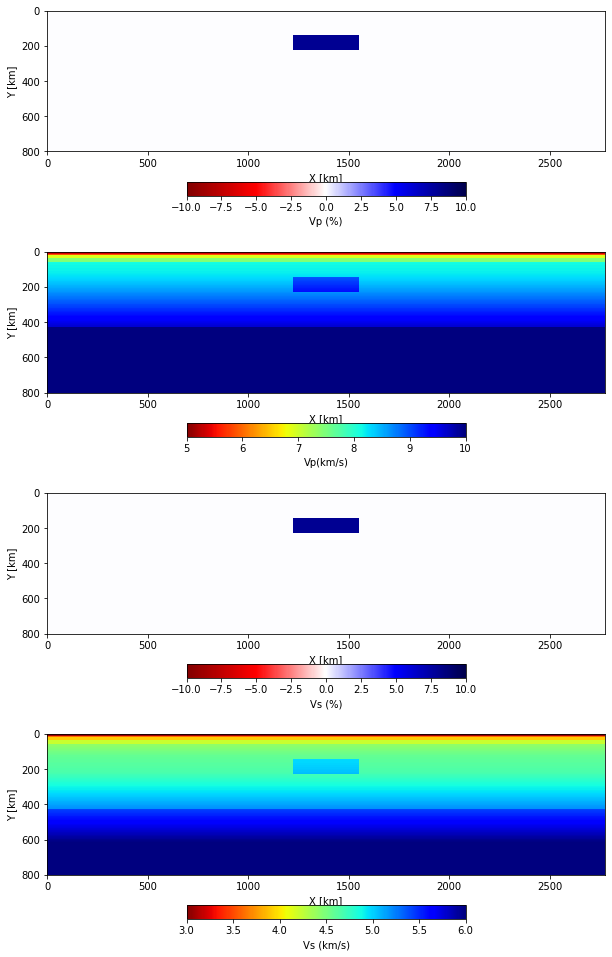

In [18]:
import matplotlib.pyplot as plt
from matplotlib import cm

plt.figure(figsize=[10, 17])
plt.subplot(411)
plt.imshow((perturb.T-1)*100,animated=True, cmap=cm.seismic_r, interpolation='nearest', vmin=-10, vmax=10,\
           extent=[0,30*111,0,900],aspect='auto')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.ylim(0,800)
plt.xlim(0,25*111)
#plt.ylim(0,400)
#plt.plot([0,45*111],[410,410],'black')
#plt.plot([0,45*111],[660,660],'black')
#plt.text(10,390,'410 km', fontsize=9)
#plt.text(10,640,'660 km', fontsize=9)
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vp (%)')

#plt.show()
plt.subplot(412)
plt.imshow(vp_3d/1000,animated=True, cmap=cm.jet_r, interpolation='nearest', vmin=5, vmax=10,\
           extent=[0,30*111,0,900],aspect='auto')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.ylim(0,800)
plt.xlim(0,25*111)
#plt.plot([0,22*111],[180,180],'black')
#plt.plot([0,45*111],[660,660],'black')
#plt.text(10,390,'410 km', fontsize=9)
#plt.text(10,640,'660 km', fontsize=9)
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vp(km/s)')
#plt.show()


plt.subplot(413)
plt.imshow((perturb.T-1)*100,animated=True, cmap=cm.seismic_r, interpolation='nearest', vmin=-10, vmax=10,\
           extent=[0,30*111,0,900],aspect='auto')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.ylim(0,800)
plt.xlim(0,25*111)
#plt.ylim(0,400)
#plt.plot([0,45*111],[410,410],'black')
#plt.plot([0,45*111],[660,660],'black')
#plt.text(10,390,'410 km', fontsize=9)
#plt.text(10,640,'660 km', fontsize=9)
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vs (%)')

plt.subplot(414)
plt.imshow(vs_3d/1000,animated=True, cmap=cm.jet_r, interpolation='nearest', vmin=3, vmax=6,\
           extent=[0,30*111,0,900],aspect='auto')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.ylim(0,800)
plt.xlim(0,25*111)
#plt.plot([0,45*111],[410,410],'black')
#plt.plot([0,45*111],[660,660],'black')
#plt.text(10,390,'410 km', fontsize=9)
#plt.text(10,640,'660 km', fontsize=9)
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vs (km/s)')
plt.savefig('model_specfem2d.pdf')

# smooth the model a little bit

In [19]:

def smooth_numpy_new(xyz_matrix,iterations,sigmaxy,sigmaz,Velocity_matrix): 
      ##input a numpy array and using asarray move to the gpu device
     # import cupy as cp
      Velocity_matrix=np.asarray(Velocity_matrix)
      xyz_matrix=np.asarray(xyz_matrix)
      Vpv_smooth_all=np.zeros((3,iterations),dtype=float)  
      #t1 = datetime.datetime.now()       
      for i in range(iterations):  
            distancex=(np.square(xyz_matrix[0][i]-xyz_matrix[0]))/(2*sigmaxy*sigmaxy)
            distancey=(np.square(xyz_matrix[1][i]-xyz_matrix[1]))/(2*sigmaxy*sigmaxy)
            #distancez=(cp.square(xyz_matrix[2][i]-xyz_matrix[2]))/(2*sigmaz*sigmaz)
            #print(distance)
            distance=distancex+distancey
            distance=np.exp(-distance)
            distance= np.divide(distance,np.sum(distance))
            #print(distance)
            Vpv_smooth_all[0][i] = np.dot(distance, Velocity_matrix[0])
            Vpv_smooth_all[1][i] = np.dot(distance, Velocity_matrix[1])
            Vpv_smooth_all[2][i] = np.dot(distance, Velocity_matrix[2])
      #print(t2-t1)
      # move array from gpu device to the host
      return Vpv_smooth_all
def smooth_cupy_new(xyz_matrix,iterations,sigmaxy,sigmaz,Velocity_matrix): 
      ##input a numpy array and using asarray move to the gpu device
      import cupy as cp
      Velocity_matrix=cp.asarray(Velocity_matrix)
      xyz_matrix=cp.asarray(xyz_matrix)
      Vpv_smooth_all=cp.zeros((3,iterations),dtype=float)  
      #t1 = datetime.datetime.now()       
      for i in range(iterations):  
            distancex=(cp.square(xyz_matrix[0][i]-xyz_matrix[0]))/(2*sigmaxy*sigmaxy)
            distancey=(cp.square(xyz_matrix[1][i]-xyz_matrix[1]))/(2*sigmaxy*sigmaxy)
            #distancez=(cp.square(xyz_matrix[2][i]-xyz_matrix[2]))/(2*sigmaz*sigmaz)
            #print(distance)
            distance=distancex+distancey
            distance=cp.exp(-distance)
            distance= cp.divide(distance,cp.sum(distance))
            #print(distance)
            Vpv_smooth_all[0][i] = cp.dot(distance, Velocity_matrix[0])
            Vpv_smooth_all[1][i] = cp.dot(distance, Velocity_matrix[1])
            Vpv_smooth_all[2][i] = cp.dot(distance, Velocity_matrix[2])
      #print(t2-t1)
      # move array from gpu device to the host
      return cp.asnumpy(Vpv_smooth_all)

def smooth_compat(x,y,Vp,Vs,rho,sigmaxy,sigmaz):   
    number_nodes=x.shape[0]
    print(number_nodes)
    V_smooth_all=np.zeros((3,number_nodes),dtype=float)
    xyz_matrix=np.zeros((2,number_nodes),dtype=float)
    xyz_matrix[0]=x
    xyz_matrix[1]=y
    Velocity_matrix=np.zeros((3,number_nodes),dtype=float)
    Velocity_matrix[0]=Vp
    Velocity_matrix[1]=Vs
    Velocity_matrix[2]=rho
    iterations=number_nodes
    #Vpv1_smooth_all=np.zeros((5,206313),dtype=float)
    test_cupy=smooth_cupy_new(xyz_matrix,iterations,sigmaxy,sigmaz,Velocity_matrix)
    return test_cupy


In [20]:
M,P=np.meshgrid(z,x)
smoothkernel=smooth_compat(P.ravel(), M.ravel(),perturb.ravel(),perturb.ravel(),perturb.ravel(),24000,24000)

144000


In [21]:
perturb_smooth=smoothkernel[0].reshape(720,200)

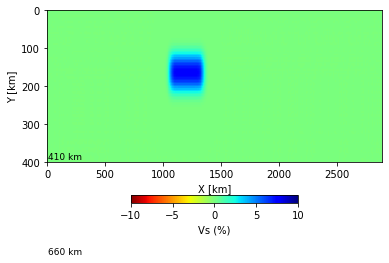

In [22]:
plt.imshow((perturb_smooth.T-1)*100,animated=True, cmap=cm.jet_r, interpolation='nearest', vmin=-10, vmax=10,\
           extent=[0,26*111,0,810],aspect='auto')
#plt.plot([0,45*111],[410,410],'black')
#plt.plot([0,45*111],[660,660],'black')
plt.text(10,390,'410 km', fontsize=9)
plt.text(10,640,'660 km', fontsize=9)

plt.ion()
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.ylim(0,400)
plt.gca().invert_yaxis()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vs (%)')

In [23]:
np.savetxt('MODELS/modelperturb_smooth.txt',perturb_smooth)

In [24]:
# Open a file in write mode
fo = open("MODELS/profile_obs_smooth.xyz", "w+") # Name of the file it has to be set in the Par_file
print( "Name of the file: ", fo.name)
orig_x=0
orig_z=0
end_x=maxx
end_z=maxz


line1 = str(orig_x)+" "+str(orig_z)+" "+str(end_x)+" "+str(end_z)+"\n"
line2 = str(spacing_x)+" "+str(spacing_z)+"\n"
line3 = str(nx)+" "+str(nz)+"\n"
# line4 : vpMin vpMax vsMin vsMax rhoMin rhoMax
line4 = str(min(vp))+" "+str(max(vp))+" "+str(min(vs))+" "+str(max(vs))+" "+str(min(rho))+" "+str(max(rho))+"\n"
# Write a line at the end of the file.
fo.write(line1)
fo.write(line2)
fo.write(line3)
fo.write(line4)


###set the heterogeneities location

for iz in np.arange(nz):
    for ix in np.arange(nx):
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(perturb_smooth[ix][iz]*vp[iz])+" "+str(perturb_smooth[ix][iz]*vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
            fo.write(lineToWrite)

#plt.show()
# Close opened file
fo.close()

fo = open("MODELS/profile_obs_numpy_smooth.xyz", "w+")
#####
print( "Name of the file: ", fo.name)
for iz in np.arange(nz):
    for ix in np.arange(nx):
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(perturb_smooth[ix][iz]*vp[iz])+" "+str(perturb_smooth[ix][iz]*vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
            fo.write(lineToWrite)

#plt.show()
# Close opened file
fo.close()


Name of the file:  MODELS/profile_obs_smooth.xyz
Name of the file:  MODELS/profile_obs_numpy_smooth.xyz


In [25]:
model=np.loadtxt('MODELS/profile_obs_numpy_smooth.xyz')
vp_3d=model.T[2].reshape(nz,nx)
vs_3d=model.T[3].reshape(nz,nx)

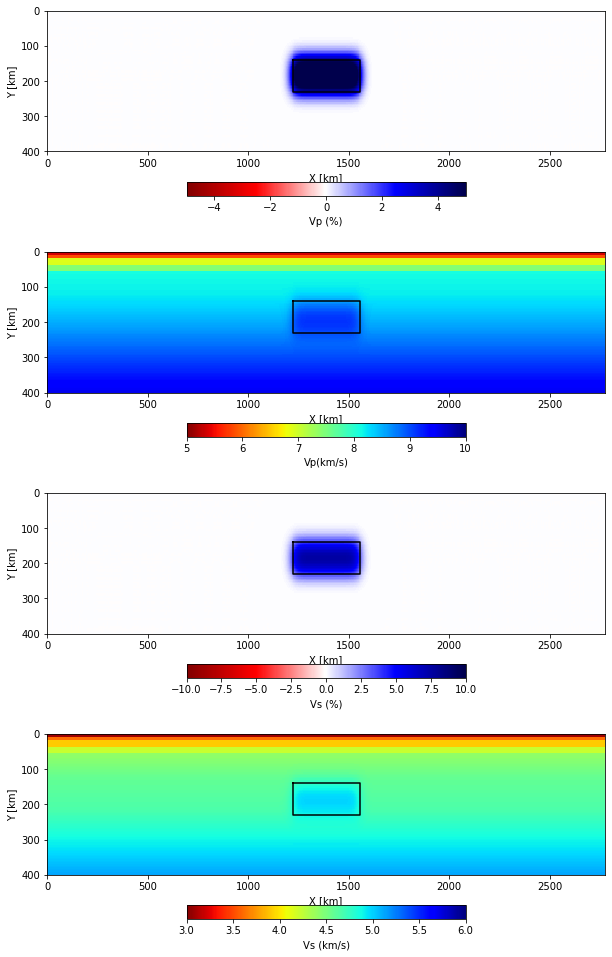

In [26]:
import matplotlib.pyplot as plt
from matplotlib import cm

plt.figure(figsize=[10, 17])
plt.subplot(411)
plt.imshow((perturb_smooth.T-1)*100,animated=True, cmap=cm.seismic_r, interpolation='nearest', vmin=-5, vmax=5,\
           extent=[0,30*111,0,900],aspect='auto')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.plot([11*111,14*111,14*111,11*111,11*111],[140,140,230,230,140],'black')
plt.ylim(0,400)
plt.xlim(0,25*111)
#plt.plot([0,45*111],[410,410],'black')
#plt.plot([0,45*111],[660,660],'black')
#plt.text(10,390,'410 km', fontsize=9)
#plt.text(10,640,'660 km', fontsize=9)
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vp (%)')

#plt.show()
plt.subplot(412)
plt.imshow(vp_3d/1000,animated=True, cmap=cm.jet_r, interpolation='nearest', vmin=5, vmax=10,\
           extent=[0,30*111,0,900],aspect='auto')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.plot([11*111,14*111,14*111,11*111,11*111],[140,140,230,230,140],'black')
#plt.plot([0,45*111],[410,410],'black')
#plt.plot([0,45*111],[660,660],'black')
#plt.text(10,390,'410 km', fontsize=9)
#plt.text(10,640,'660 km', fontsize=9)
plt.ylim(0,400)
plt.xlim(0,25*111)
plt.gca().invert_yaxis()

plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vp(km/s)')
#plt.show()


plt.subplot(413)
plt.imshow((perturb_smooth.T-1)*100,animated=True, cmap=cm.seismic_r, interpolation='nearest', vmin=-10, vmax=10,\
           extent=[0,30*111,0,900],aspect='auto')

plt.plot([11*111,14*111,14*111,11*111,11*111],[140,140,230,230,140],'black')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.ylim(0,400)
plt.xlim(0,25*111)
#plt.plot([0,45*111],[410,410],'black')
#plt.plot([0,45*111],[660,660],'black')
#plt.text(10,390,'410 km', fontsize=9)
#plt.text(10,640,'660 km', fontsize=9)
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vs (%)')

plt.subplot(414)
plt.imshow(vs_3d/1000,animated=True, cmap=cm.jet_r, interpolation='nearest', vmin=3, vmax=6,\
           extent=[0,30*111,0,900],aspect='auto')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.plot([11*111,14*111,14*111,11*111,11*111],[140,140,230,230,140],'black')
plt.ylim(0,400)
plt.xlim(0,25*111)
#plt.plot([0,45*111],[410,410],'black')
#plt.plot([0,45*111],[660,660],'black')
#plt.text(10,390,'410 km', fontsize=9)
#plt.text(10,640,'660 km', fontsize=9)
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vs (km/s)')
plt.savefig('/home/yjgao/Nextcloud/thesis/Theory_figures/model_specfem2d_smooth.pdf')

In [27]:
######################################here to generate a new model from the smoothed kernel

In [28]:
# Open a file in write mode
fo = open("MODELS/profile_obs_smooth.xyz", "w+") # Name of the file it has to be set in the Par_file
print( "Name of the file: ", fo.name)
orig_x=0
orig_z=0
end_x=maxx
end_z=maxz


line1 = str(orig_x)+" "+str(orig_z)+" "+str(end_x)+" "+str(end_z)+"\n"
line2 = str(spacing_x)+" "+str(spacing_z)+"\n"
line3 = str(nx)+" "+str(nz)+"\n"
# line4 : vpMin vpMax vsMin vsMax rhoMin rhoMax
line4 = str(min(vp))+" "+str(max(vp))+" "+str(min(vs))+" "+str(max(vs))+" "+str(min(rho))+" "+str(max(rho))+"\n"
# Write a line at the end of the file.
fo.write(line1)
fo.write(line2)
fo.write(line3)
fo.write(line4)


###set the heterogeneities location
xl=(5.5+10)*111*1000
xr=(9+10)*111*1000
zu=-200*1000
zb=-380*1000

for iz in np.arange(nz):
    for ix in np.arange(nx):
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(perturb_smooth[ix][iz]*vp[iz])+" "+str(perturb_smooth[ix][iz]*vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
            fo.write(lineToWrite)

#plt.show()
# Close opened file
fo.close()

fo = open("MODELS/profile_obs_numpy_smooth.xyz", "w+")
#####
print( "Name of the file: ", fo.name)
for iz in np.arange(nz):
    for ix in np.arange(nx):
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(perturb_smooth[ix][iz]*vp[iz])+" "+str(perturb_smooth[ix][iz]*vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
            fo.write(lineToWrite)

#plt.show()
# Close opened file
fo.close()


Name of the file:  MODELS/profile_obs_smooth.xyz
Name of the file:  MODELS/profile_obs_numpy_smooth.xyz


In [39]:
fo = open("MODELS/modeldiff.xyz", "w+")
#####
diff=perturb_smooth-perturb
print( "Name of the file: ", fo.name)
for iz in np.arange(nz):
    for ix in np.arange(nx):
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(diff[ix][iz])+" "+str(diff[ix][iz])+" "+str(diff[ix][iz])+"\n" # x z vp vs rho
            fo.write(lineToWrite)
fo.close()

Name of the file:  MODELS/modeldiff.xyz


In [37]:
model_cp=np.loadtxt('MODELS/profile_obs_numpy.xyz').copy()
model_cp.T[3]=diff.ravel()
np.savetxt('MODELS/modeldiff.txt',model_cp)

In [41]:
diff.shape

(720, 200)

(144000, 5)

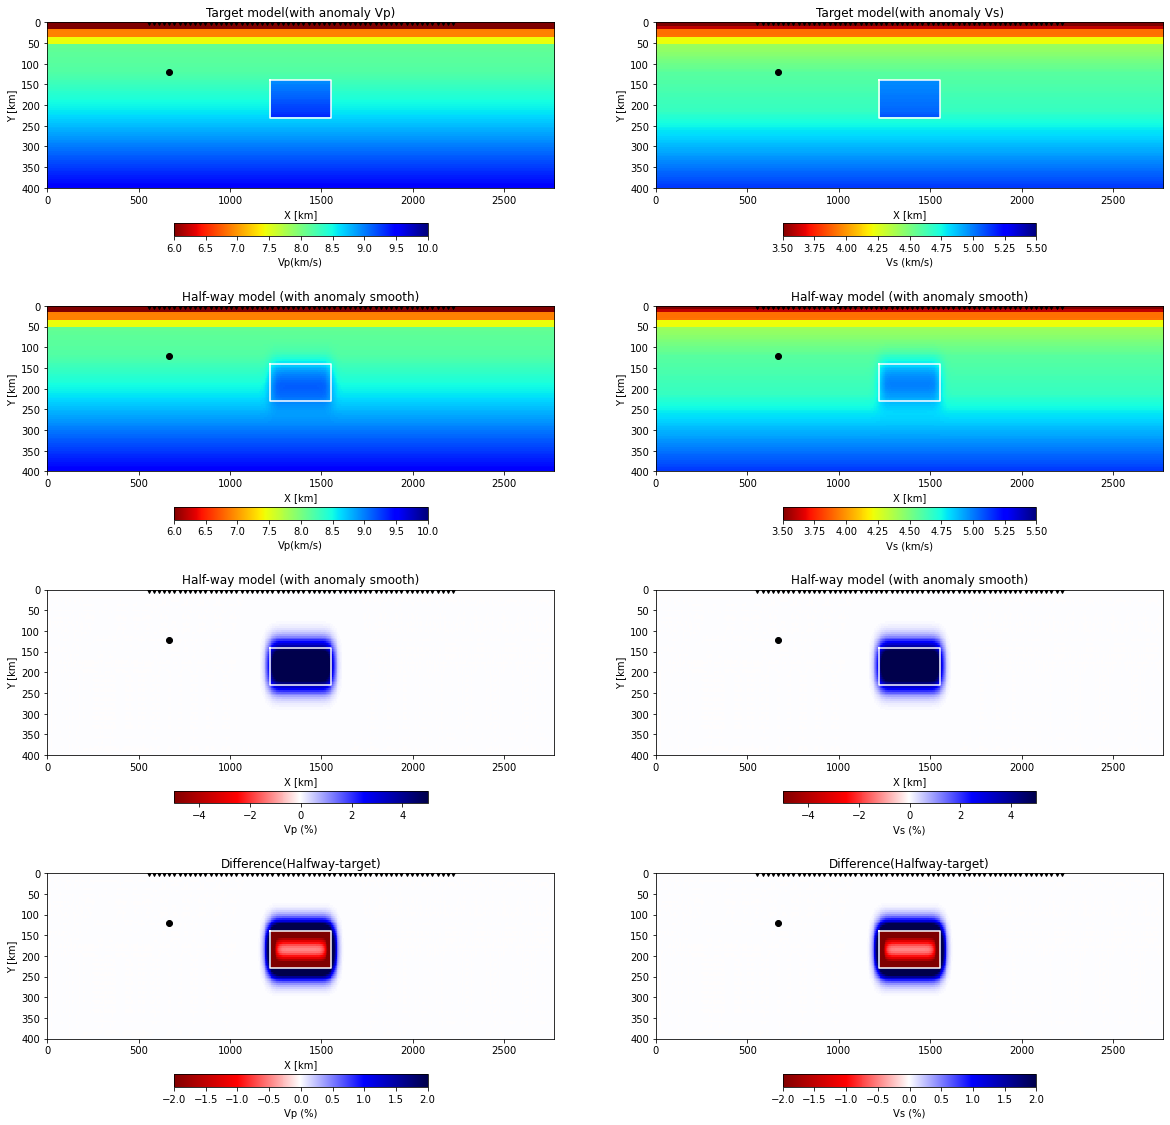

In [40]:
import matplotlib.pyplot as plt
from matplotlib import cm
##########
plt.figure(figsize=[20, 20])


plt.subplot(421)
model=np.loadtxt('MODELS/profile_obs_numpy.xyz')
vp_3d=model.T[2].reshape(nz,nx)
plt.imshow(vp_3d/1000,animated=True, cmap=cm.jet_r, interpolation='nearest', vmin=6, vmax=10,extent=[0,30*111,0,900],aspect='auto')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.plot([11*111,14*111,14*111,11*111,11*111],[140,140,230,230,140],'white')
plt.ylim(0,400)
plt.xlim(0,25*111)
receiver_x=np.linspace(555,2220,60)
receiver_z=1e-3*np.zeros(60)
plt.plot(receiver_x,receiver_z, 'vk')
plt.plot(666,121,'o',color='black')
plt.title('Target model(with anomaly Vp)')
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vp(km/s)')
#plt.show()

plt.subplot(423)
model=np.loadtxt('MODELS/profile_obs_numpy_smooth.xyz')
vp_3d=model.T[2].reshape(nz,nx)
plt.imshow(vp_3d/1000,animated=True, cmap=cm.jet_r, interpolation='nearest', vmin=6, vmax=10,extent=[0,30*111,0,900],aspect='auto')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.plot([11*111,14*111,14*111,11*111,11*111],[140,140,230,230,140],'white')
plt.ylim(0,400)
plt.xlim(0,25*111)
#plt.plot([0,45*111],[410,410],'black')
#plt.plot([0,45*111],[660,660],'black')
#plt.text(10,390,'410 km', fontsize=9)
#plt.text(10,640,'660 km', fontsize=9)
#plt.plot([18*111,25*111,25*111,18*111,18*111],[500,500,660,660,500],'black')
receiver_x=np.linspace(555,2220,60)
receiver_z=1e-3*np.zeros(60)
plt.plot(receiver_x,receiver_z, 'vk')
plt.plot(666,121,'o',color='black')
plt.title('Half-way model (with anomaly smooth)')
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vp(km/s)')


plt.subplot(425)
plt.imshow((perturb_smooth.T-1)*100,animated=True, cmap=cm.seismic_r, interpolation='nearest', vmin=-5, vmax=5,\
           extent=[0,30*111,0,900],aspect='auto')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.plot([11*111,14*111,14*111,11*111,11*111],[140,140,230,230,140],'white')
#plt.text(10,390,'410 km', fontsize=9)
#plt.text(10,640,'660 km', fontsize=9)

plt.plot(receiver_x,receiver_z, 'vk')
plt.plot(666,121,'o',color='black')
plt.ylim(0,400)
plt.xlim(0,25*111)
plt.title('Half-way model (with anomaly smooth)')
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vp (%)')



plt.subplot(427)
plt.imshow((diff.T)*100,animated=True, cmap=cm.seismic_r, interpolation='nearest', vmin=-2, vmax=2,\
           extent=[0,30*111,0,900],aspect='auto')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.plot([11*111,14*111,14*111,11*111,11*111],[140,140,230,230,140],'white')


plt.plot(receiver_x,receiver_z, 'vk')
plt.plot(666,121,'o',color='black')
plt.title('Difference(Halfway-target)')
plt.ylim(0,400)
plt.xlim(0,25*111)
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vp (%)')

########################################################################################

plt.subplot(422)
model=np.loadtxt('MODELS/profile_obs_numpy.xyz')
vp_3d=model.T[3].reshape(nz,nx)
vs_3d=model.T[3].reshape(nz,nx)
plt.imshow(vs_3d/1000,animated=True, cmap=cm.jet_r, interpolation='nearest', vmin=3.5, vmax=5.5,\
           extent=[0,30*111,0,900],aspect='auto')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.plot([11*111,14*111,14*111,11*111,11*111],[140,140,230,230,140],'white')
plt.plot(receiver_x,receiver_z, 'vk')
plt.plot(666,121,'o',color='black')
plt.title('Target model(with anomaly Vs)')
plt.ylim(0,400)
plt.xlim(0,25*111)
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vs (km/s)')
#plt.show()

plt.subplot(424)
model=np.loadtxt('MODELS/profile_obs_numpy_smooth.xyz')
vs_3d=model.T[3].reshape(nz,nx)
vp_3d=model.T[2].reshape(nz,nx)
plt.imshow(vs_3d/1000,animated=True, cmap=cm.jet_r, interpolation='nearest', vmin=3.5, vmax=5.5,\
           extent=[0,30*111,0,900],aspect='auto')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.plot([11*111,14*111,14*111,11*111,11*111],[140,140,230,230,140],'white')
plt.plot(receiver_x,receiver_z, 'vk')
plt.plot(666,121,'o',color='black')
plt.title('Half-way model (with anomaly smooth)')
plt.ylim(0,400)
plt.xlim(0,25*111)
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vs (km/s)')


plt.subplot(426)
plt.imshow((perturb_smooth.T-1)*100,animated=True, cmap=cm.seismic_r, interpolation='nearest', vmin=-5, \
           vmax=5,extent=[0,30*111,0,900],aspect='auto')
plt.xlabel('X [km]')
plt.ylabel('Y [km]')
plt.plot([11*111,14*111,14*111,11*111,11*111],[140,140,230,230,140],'white')
plt.ylim(0,400)
plt.xlim(0,25*111)
receiver_x=np.linspace(555,2220,60)
receiver_z=1e-3*np.zeros(60)
plt.plot(receiver_x,receiver_z, 'vk')
plt.plot(666,121,'o',color='black')
plt.title('Half-way model (with anomaly smooth)')
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vs (%)')



plt.subplot(428)
plt.imshow((diff.T)*100,animated=True, cmap=cm.seismic_r, interpolation='nearest', vmin=-2, vmax=2,\
           extent=[0,30*111,0,900],aspect='auto')
plt.ylim(0,400)
plt.xlim(0,25*111)
plt.plot([11*111,14*111,14*111,11*111,11*111],[140,140,230,230,140],'white')
receiver_x=np.linspace(555,2220,60)
receiver_z=1e-3*np.zeros(60)
plt.plot(receiver_x,receiver_z, 'vk')
plt.plot(666,121,'o',color='black')
plt.title('Difference(Halfway-target)')
plt.gca().invert_yaxis()
plt.ion()
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vs (%)')

plt.savefig('/home/yjgao/Nextcloud/thesis/Theory_figures/model_specfem2d_smooth_diff.pdf')

In [ ]:
perturb=(data_interpolate.max()-data_interpolate)/data_interpolate.max()/10+1
plt.imshow(perturb)
plt.colorbar()

In [ ]:
perturb.shape

In [ ]:
x.shape

In [ ]:
from PIL import Image
data=Image.open('MODELS/slab/slab.png')
newdata=np.swapaxes(data,0,2)
slab=newdata[0].T
from scipy.interpolate import griddata
data=slab
#np.loadtxt('MODELS/Figures_venice/venice.txt')
x_temp = np.linspace(-1,nx+1, data.shape[1])
z_temp = np.linspace(-1,nz+1, data.shape[0])
zv, xv = np.meshgrid(z_temp, x_temp)
grid_z, grid_x = np.mgrid[0:nz:1, 0:nx:1]
data_interpolate = griddata((zv.ravel(),xv.ravel()), data.T.ravel(), (grid_z, grid_x), method='cubic')
plt.imshow(data_interpolate)
plt.colorbar()

In [ ]:
fo = open("MODELS/profile_obs.xyz", "w+") # Name of the file it has to be set in the Par_file
print( "Name of the file: ", fo.name)
orig_x=0
orig_z=0
end_x=maxx
end_z=maxz


line1 = str(orig_x)+" "+str(orig_z)+" "+str(end_x)+" "+str(end_z)+"\n"
line2 = str(spacing_x)+" "+str(spacing_z)+"\n"
line3 = str(nx)+" "+str(nz)+"\n"
# line4 : vpMin vpMax vsMin vsMax rhoMin rhoMax
line4 = str(min(vp))+" "+str(max(vp))+" "+str(min(vs))+" "+str(max(vs))+" "+str(min(rho))+" "+str(max(rho))+"\n"
# Write a line at the end of the file.
fo.write(line1)
fo.write(line2)
fo.write(line3)
fo.write(line4)


###set the heterogeneities location

for iz in np.arange(nz):
    for ix in np.arange(nx):
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(perturb[nz-iz-1][ix]*vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
            fo.write(lineToWrite)

#plt.show()
# Close opened file
fo.close()



In [ ]:
fo = open("MODELS/profile_obs_numpy.xyz", "w+") # Name of the file it has to be set in the Par_file
print( "Name of the file: ", fo.name)
orig_x=0
orig_z=0
end_x=maxx
end_z=maxz


line1 = str(orig_x)+" "+str(orig_z)+" "+str(end_x)+" "+str(end_z)+"\n"
line2 = str(spacing_x)+" "+str(spacing_z)+"\n"
line3 = str(nx)+" "+str(nz)+"\n"
# line4 : vpMin vpMax vsMin vsMax rhoMin rhoMax
line4 = str(min(vp))+" "+str(max(vp))+" "+str(min(vs))+" "+str(max(vs))+" "+str(min(rho))+" "+str(max(rho))+"\n"
# Write a line at the end of the file.
#fo.write(line1)
#fo.write(line2)
#fo.write(line3)
#fo.write(line4)


###set the heterogeneities location
xl=(5.5+10)*111*1000
xr=(9+10)*111*1000
zu=-200*1000
zb=-380*1000


for iz in np.arange(nz):
    for ix in np.arange(nx):
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(perturb[nz-iz-1][ix]*vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
            fo.write(lineToWrite)


#plt.show()
# Close opened file
fo.close()

In [ ]:
smoothkernel=smooth_compat(grid_x.ravel(), grid_z.ravel(),perturb.ravel(),perturb.ravel(),perturb.ravel(),100000/(45*111000/nx),100000/((1000000/nz)))

In [ ]:
perturb_smooth=smoothkernel[1].reshape(nz,nx)

In [ ]:
plt.imshow(perturb_smooth)

In [ ]:
fo = open("MODELS/profile_syn.xyz", "w+") # Name of the file it has to be set in the Par_file
print( "Name of the file: ", fo.name)
orig_x=0
orig_z=0
end_x=maxx
end_z=maxz


line1 = str(orig_x)+" "+str(orig_z)+" "+str(end_x)+" "+str(end_z)+"\n"
line2 = str(spacing_x)+" "+str(spacing_z)+"\n"
line3 = str(nx)+" "+str(nz)+"\n"
# line4 : vpMin vpMax vsMin vsMax rhoMin rhoMax
line4 = str(min(vp))+" "+str(max(vp))+" "+str(min(vs))+" "+str(max(vs))+" "+str(min(rho))+" "+str(max(rho))+"\n"
# Write a line at the end of the file.
fo.write(line1)
fo.write(line2)
fo.write(line3)
fo.write(line4)


###set the heterogeneities location
xl=(6.5+10)*111*1000
xr=(8+10)*111*1000
zu=-220*1000
zb=-360*1000

for iz in np.arange(nz):
    for ix in np.arange(nx):
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(perturb_smooth[nz-iz-1][ix]*vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
            fo.write(lineToWrite)


#plt.show()
# Close opened file
fo.close()

In [ ]:
perturb_smooth.max()

In [ ]:
fo = open("MODELS/profile_syn_numpy.xyz", "w+") # Name of the file it has to be set in the Par_file
print( "Name of the file: ", fo.name)
orig_x=0
orig_z=0
end_x=maxx
end_z=maxz


# Write a line at the end of the file.
#fo.write(line1)
#fo.write(line2)
#fo.write(line3)
#fo.write(line4)


###set the heterogeneities location
xl=(5.5+10)*111*1000
xr=(9+10)*111*1000
zu=-200*1000
zb=-380*1000


for iz in np.arange(nz):
    for ix in np.arange(nx):
            lineToWrite= str(x[ix])+" "+str(z[iz])+" "+str(perturb_smooth[nz-iz-1][ix]*vp[iz])+" "+str(vs[iz])+" "+str(rho[iz])+"\n" # x z vp vs rho
            fo.write(lineToWrite)


#plt.show()
# Close opened file
fo.close()

In [ ]:
###### define a heart shape anomaly around the source
isx=400
isz=120
perturb=np.ones((800,200))
for i in np.arange(isx-100,isx+100):
    #print(i-isx)
    for j in np.arange(isz,nz):
        #print(100*np.sqrt(2*np.abs((i-isx)/100)-((i-isx)/100)**2))
        if j<30*np.sqrt(2*np.abs((i-isx)/30)-((i-isx)/30)**2)+isz:
              perturb[i][j]=0.95
                
#50*(-2.14)*np.sqrt(np.sqrt(2)-np.sqrt(np.abs(x_heart/50)))
for i in np.arange(isx-100,isx+100):
    #print(i-isx)
    for j in np.arange(0,isz):
        #print(np.sqrt(np.sqrt(2)-np.sqrt(np.abs(i-isx/100))))
        if j> 30*(-2.14)*(np.sqrt(np.sqrt(2)-np.sqrt(np.abs((i-isx)/30))))+isz:
              perturb[i][j]=0.95
